# ** Data preprocessing**

> Data preprocessing is the process of cleaning. transforming and organizing the raw data.

> 1: getting dataset

> 2: importing labraries

> 3: Loading dataset

> 4: handling missing values

> 5: spliting data on training and testing

> 6: Feature scaling















In [1]:
# importing labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading dataset**

In [2]:
df = pd.read_csv("/content/Data.csv")

In [3]:
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df.tail(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
df.shape

(10, 4)

In [6]:
# check missing values
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

# **handling missing values**

In [7]:
x = df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
y = df.iloc[:,3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# **Handling through imputer**

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data
imputer.fit(x[:,1:3])

# Transform your data to replace missing values
x[:,1:3] = imputer.transform(x[:,1:3])

In [10]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# **Encoding categories**

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x[:,0]=label_encoder_x.fit_transform(x[:,0])
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [12]:
# dummy encodeing
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
x = OneHotEncoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()
x

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# **spliting data**

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [15]:
x_train.shape

(8, 3)

In [16]:
y_train.shape

(8,)

In [17]:
x_test.shape

(2, 3)

In [18]:
y_test.shape

(2,)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train, x_test)


# **Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = le.predict(x_test)
print(y_pred)
print(y_pred.shape)

[0.52165064 0.30514428]
(2,)


In [22]:
# define actual values
results = np.column_stack((y_test, y_pred))

print("actuall values | predicted values")
print("-----------------------")
for actual, predicted in results:
  print(f"{actual:10.2f} | {predicted:8.2f}")

actuall values | predicted values
-----------------------
      0.00 |     0.52
      1.00 |     0.31


In [23]:
residual = actual- y_pred.reshape(-1)
print(residual)

[0.47834936 0.69485572]


<ipython-input-24-71f1e02e2741>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, kde=True)


<Axes: ylabel='Density'>

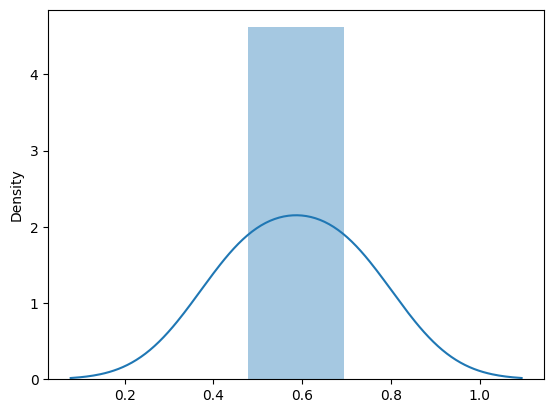

In [24]:
import seaborn as sns
sns.distplot(residual, kde=True)

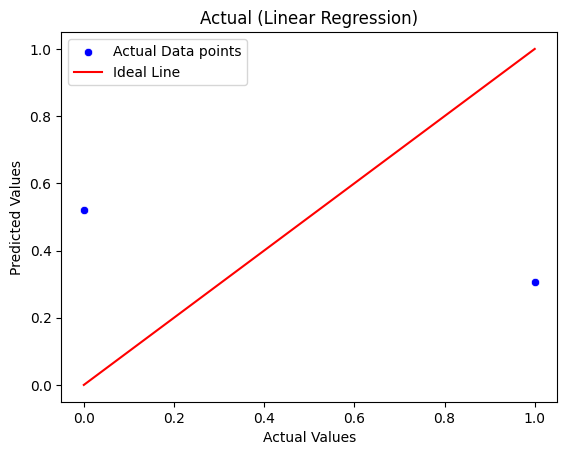

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

In [26]:
print('Train Score: ', le.score(x_train, y_train))
print('Test Score: ', le.score(x_test, y_test))

Train Score:  0.375
Test Score:  -0.5098877018922197


In [28]:
from sklearn.metrics import mean_squared_error

print("Linear Regression Model")
print("--"*30)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mean squard error:", mse)
print("root mean squard error:", rmse)

Linear Regression Model
------------------------------------------------------------
mean squard error: 0.3774719254730549
root mean squard error: 0.6143874392214207


In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train,y_train)

# predict using test
y_pred  = dtr.predict(x_test)

dtr = mean_squared_error(y_test, y_pred)
print("DecisionTreeRegressor", dtr)

DecisionTreeRegressor 0.625


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr = rfr.fit(x_train, y_train)

# predict values using test
y_pred = rfr.predict(x_test)

rfr = mean_squared_error(y_pred, y_test)
print("RandomForestRegressor", rfr)

RandomForestRegressor 0.520627679138322


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr = gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)
gbr = mean_squared_error(y_test, y_pred)
print("GradientBoostingRegressor", gbr)

GradientBoostingRegressor 0.6249867193887446
